In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure and plot functions
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [2]:
# from HFC32_emimTf2N_PR import configuration
from HFC125_hmimFAP_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R125_hmimFAP.csv')
# print(data)

# Create Model and Run Parmest

In [4]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-20 16:31:03 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [5]:
print(data)

   temperature  pressure  x_R125  x_hmimFAP
0       298.15     50000   0.038      0.962
1       298.15    100000   0.074      0.926
2       298.15    200000   0.142      0.858
3       298.15    400000   0.267      0.733
4       298.15    600000   0.380      0.620
5       298.15    800000   0.482      0.518
6       298.15   1000000   0.578      0.422


In [6]:
binary_params_peng(data, configuration, 'R125', 'hmimFAP', "x_R125", "x_hmimFAP", 
    init_temp =  298.15, init_press =   100000 , init_x_c1 =    0.074, init_x_c2 = 0.926,
    init_kappa_2_1 = 0.05, init_kappa_1_2 = 0.05, eps = 0.1, scaling_fac = 1e-9 , read=False)

2021-04-20 16:31:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-20 16:31:04 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-20 16:31:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-20 16:31:04 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-20 16:31:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-20 16:31:05 [INFO] idaes.init.fs.state_

In [7]:
k12 = -0.04521400918380329
k21 = -0.1381297766219178

# Best Fit

In [8]:
R125_x,P= calc_outlet_xP(data,m,"R125", "hmimFAP", k21, k12,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


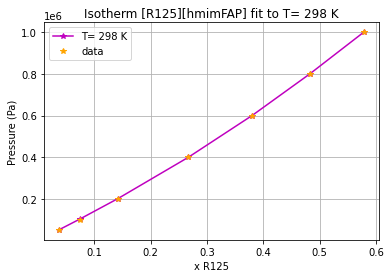

In [9]:
plt.plot(R125_x,P,"m*-",label="T= 298 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][hmimFAP] fit to T= 298 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
# plt.ylim(0,1300000)
plt.legend()
plt.show()